<a href="https://colab.research.google.com/github/zamoravm1/Fundamentos_Procesamiento_Lenguaje-_Natural_con_Python_y_NLTK/blob/master/c3_code_language_with_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuración inicial**

In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Los n-grammas base de muchos algoritmos, para clasificar texto, identificación del habla, identificar colocaciones. Identificar qué se habla sobre lo que dicen en redes sociales de cierta marca.

# **Bi-gramas**
Parejas de palabras que ocurren consecutivas

In [2]:
md_bigrams=list(bigrams(text1))
#distribución de probabilidades
fdist=FreqDist(md_bigrams)

Obtenemos los bi-gramas mèas frecuentes de este texto:

In [3]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

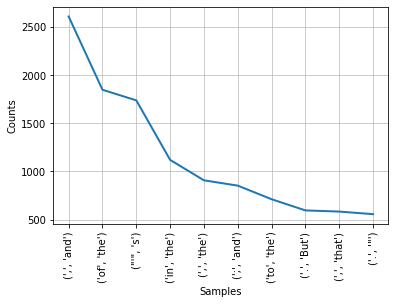

In [4]:
fdist.plot(10)

## Filtrado de bi-gramas

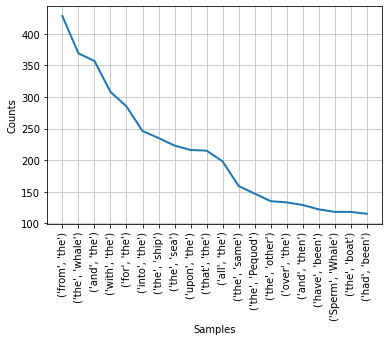

In [5]:
#elemento 1 y 2 del bi-grama con más de 2 caracteres
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
#Distribución filtrada
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

## Trigramas

In [6]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3))
fdist= FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

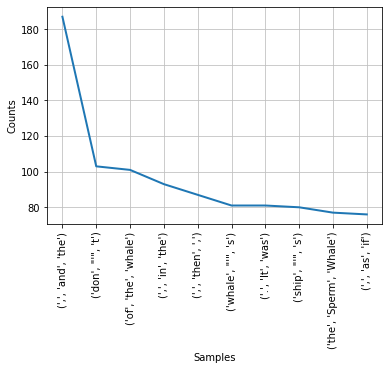

In [7]:
fdist.plot(10)

# Collocations (Colocaciones)
* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

In [8]:
md_bigrams = list(bigrams(text1))

#IDENTIFICANDO COLOCACIONES, HALLAREMOS LOS BIGRAMAS QUE MÁS SE REPITEN

#distribución de bi-gramas+s filtrados
threshold=2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigrams_dist = FreqDist(filtered_bigrams)

#distribución de palabras filtradas
filtered_words = [word for word in text1 if len(word)>threshold]
#construimos la distr.
filtered_word_dist=FreqDist(filtered_words)

# dataframes, instancias un objeto de la libreria pandas
# df es la versión de una hoja de excel en python
df= pd.DataFrame()
df['bi_grams'] = list(set(filtered_bigrams))
#construimos una columna para cada componente de los bigramas
#apply - Function to apply to each column or row. Default colums. Argument- the function.
df['word_0'] = df['bi_grams'].apply(lambda x:x[1])
df['word_1'] = df['bi_grams'].apply(lambda x:x[1])
#Frecuencia de aparición
#Frecuencia del bigrama
#Cogemos la columna que contiene los bigramas. que me devuelva la frecuencia de aparición.
df['bi_gram_freq'] = df['bi_grams'].apply(lambda x: filtered_bigrams_dist[x])
df['word_0_freq'] =df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] =df['word_1'].apply(lambda x: filtered_word_dist[x])


#Pointwise Mutual Informa\tion (PMI)

Una métrica basada en teoria de la información para encontrar **Collocations.** it is a measure of association. It compares the probability of two events occurring together to what this probability would be if the events were independent.[2]

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

frecuencia de aparicion del bi-grama/fecuenta de aparición de primera palabra * frecuencia de aparación de 2da paralabra


Necesitamos también una segunda metrica, la frecuencia en sí de los bigramas.

In [9]:
#aquí x es la tripleta de valores. x-values[0] seria bigram_freq
# necesitamos colocar "axis 1" para que se interprete correctamente que queremos
# aplicar la función a cada elemento en las filas.
df['PMI'] = df[['bi_gram_freq','word_0_freq','word_1_freq']].apply(lambda x: np.log(x.values[0]/(x.values[1]*x.values[2])), axis=1)
#aplicamos log para tener la mismas escala de PMI
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x:np.log2(x))

In [10]:
#identificamos los bi-gramas con más probabilidades de aplicación 
#(valor más grande, valor más cercano a cero), que deberían ser las colocaciones.
df.sort_values(by = 'PMI', ascending = False)

bi_grams     word_0     word_1  bi_gram_freq  word_0_freq  \
22227  (HUSSEY, SURVIVORS)  SURVIVORS  SURVIVORS             1            1   
6382      (some, coasting)   coasting   coasting             1            1   
34498       (The, Quarter)    Quarter    Quarter             1            1   
54935         (gay, flags)      flags      flags             1            1   
16229     (while, arching)    arching    arching             1            1   
...                    ...        ...        ...           ...          ...   
8439       (respects, the)        the        the             1        13721   
26975          (Damn, the)        the        the             1        13721   
54721    (descending, the)        the        the             1        13721   
17965        (sudden, the)        the        the             1        13721   
3336     (contradict, the)        the        the             1        13721   

       word_1_freq        PMI  log(bi_gram_freq)  
22227            1   0.000000                0.0  
6382             1   0.000000                0.0  
34498            1   0.000000                0.0  
54935            1   0.000000                0.0  
16229            1   0.000000                0.0  
...            ...        ...                ...  
8439         13721 -19.053366                0.0  
26975        13721 -19.053366                0.0  
54721        13721 -19.053366                0.0  
17965        13721 -19.053366                0.0  
3336         13721 -19.053366                0.0  

[67942 rows x 8 columns]

## **Construcción de gráfico para identificar collocations**

In [11]:
#gráfico de dispersión
#hover_name, especificar qué variable aparece cuando me ubico en un punto con el cursor.
fig = px.scatter(x = df['PMI'].values, y=df['log(bi_gram_freq)'], color = df['PMI'].values + df['log(bi_gram_freq)'], 
                 hover_name= df['bi_grams'].values,width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram frecuency)'})
fig.show()

# Clase 14: Filtros y colocaciones NLTK

Hacer el mismo proceso de identificar colocaciones (sin la visualización)utilizando nltk, mucho más rápido y  sencillo.

## Medidas pre-contruidas en NLTK

In [12]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html
from nltk.collocations import *
#importar la parte especifica para hacer uso de PMI
bigram_measure = nltk.collocations.BigramAssocMeasures()
#definimos un método para implementar una clase que identifica las colocaciones
finder =BigramCollocationFinder.from_words(text1)

In [13]:
#aplicar un filtro de frecuencia.  minimo 20 veces.
finder.apply_freq_filter(20)
#coloca las colocaciones más frecuentes de la lista y la cantidad que quiero que me muestre.
finder.nbest(bigram_measure.pmi,10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

# Ejemplos textos en español

In [ ]:
# descargamos el corpus en español https://mailman.uib.no/public/corpora/2007-October/005448.html
nltk.download('cess_esp')
# obtenemos el corpus como una lista de listas
corpus = nltk.corpus.cess_esp.sents()
# obtenemos una lista plana
flatten_corpus = [w for l in corpus for w in l]

In [29]:
# print(flatten_corpus)
# filtramos y adquirimos los bigramas, la entrada debe ser una lista.
# utilizamos "documents" y no "words" porque tenemos una lista de listas y no una lista sola.
finder =BigramCollocationFinder.from_documents(corpus)
# descartamos los que no tienen suficiente frecuencia
finder.apply_freq_filter(10)
# seleccionamos los que mejor pmi vs frecuencia tienen.
finder.nbest(bigram_measure.pmi,10)


[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

# Referencias para seguir aprendiendo


*   [Mas sobre Colocaciones con NLTK](http://www.nltk.org/howto/collocations.html)